In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")
print("x train")
print(X_train)
print("x test")
print(X_test)
print("y train")
print(y_train)
print("y test")
print(y_test)

X_train: 50000
X_test: 10000
y_train: 50000
y_test: 10000
x train
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   

In [4]:
print(X_test[789])

[[[100 111 134]
  [ 98 110 132]
  [ 98 109 131]
  ...
  [ 69  89 114]
  [ 67  87 113]
  [ 66  86 111]]

 [[ 98 109 131]
  [ 95 106 128]
  [ 94 105 127]
  ...
  [ 65  85 110]
  [ 64  84 109]
  [ 63  83 107]]

 [[ 94 105 127]
  [ 92 103 125]
  [ 92 103 125]
  ...
  [ 63  83 108]
  [ 62  82 107]
  [ 60  80 105]]

 ...

 [[ 13  27  40]
  [ 12  26  39]
  [ 12  26  39]
  ...
  [  4   6  21]
  [  5   7  22]
  [  4   7  22]]

 [[ 12  24  38]
  [ 14  26  39]
  [  9  21  34]
  ...
  [  3   5  19]
  [  3   5  20]
  [  5   7  22]]

 [[ 14  23  34]
  [ 12  21  31]
  [  9  19  29]
  ...
  [  4   4  17]
  [  4   5  18]
  [  5   5  18]]]


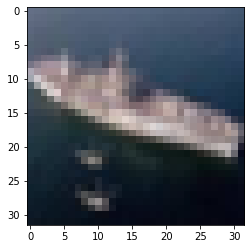

(32, 32, 3)


In [5]:
plt.imshow(X_test[789])
plt.show()
print(X_test[789].shape)

In [6]:
X_val = X_train[40000:]
y_val = y_train[40000:]
X_train = X_train[:40000]
y_train = y_train[:40000]

In [7]:
print(f"X_train: {len(X_train)}")
print(f"X_val: {len(X_val)}")
print(f"X_test: {len(X_test)}")

X_train: 40000
X_val: 10000
X_test: 10000


In [8]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [13]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [15]:
model.add(tf.keras.layers.Flatten())

In [16]:
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [17]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [18]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [19]:
results = model.fit(X_train, y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
313/313 [==============================] - 16s 11ms/step - loss: 1.9952 - accuracy: 0.2386 - val_loss: 1.6372 - val_accuracy: 0.4099
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 1.6754 - accuracy: 0.3669 - val_loss: 1.4051 - val_accuracy: 0.4856
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 1.5157 - accuracy: 0.4372 - val_loss: 1.3111 - val_accuracy: 0.5351
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.4047 - accuracy: 0.4853 - val_loss: 1.2101 - val_accuracy: 0.5756
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.3065 - accuracy: 0.5258 - val_loss: 1.1000 - val_accuracy: 0.6140
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2331 - accuracy: 0.5561 - val_loss: 1.0499 - val_accuracy: 0.6334
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.1564 - accuracy: 0.5862 - val_loss: 1.0131 - val_accuracy: 0.6434
Ep

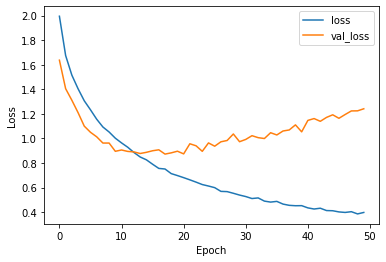

In [20]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

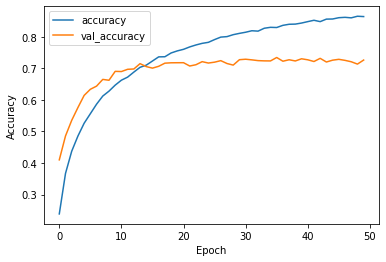

In [21]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2744 - accuracy: 0.7249


[1.2744438648223877, 0.7249000072479248]

In [23]:
prediction_result = model.predict(X_test[789].reshape(1,32,32,3))
print(prediction_result)

[[7.0474438e-05 2.3509793e-11 1.4178354e-14 1.4822984e-17 2.1885835e-23
  2.9688936e-24 1.4974560e-17 2.8146933e-22 9.9992955e-01 4.1692578e-12]]


In [24]:
predicted_class = prediction_result.argmax()
predicted_probability = prediction_result.max()

In [25]:
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability.")

This image belongs to class 8 with 0.9999295473098755 probability.
